Our project is to uncover patterns in music on Spotify between 2010 and 2019. We'll examine musical trends and genres through the years; which artists appeared most frequently.

* What is the most popular genre?

* What is the least popular genre?

* Who is the most popular artist?

* Who is the least popular artist?

* Did we see artists make the top ten for various years or just one?

* Do beats per minute correlate to ‘dancibility’?

* What is the statistical analysis for beats per minute?

* Are any of the songs outliers?



# Tasks
* Collect the Data
* Clean and merge data
* Explore the data
* Create Analysis
* Create the Presentation

In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import os
import csv
import numpy as np
import scipy.stats as stats




In [2]:
#Import data
music_data_to_load = "top10s.csv"

In [3]:
music_data_to_load


'top10s.csv'

In [4]:
# Data File and store into Pandas DataFrames
music_data_pd = pd.read_csv(music_data_to_load, sep=',', encoding='latin-1')
music_data_pd.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [5]:
# Determine most popular genre overall 
# top_genre = music_data_pd.groupby(["top genre"])
top_genre_df = pd.DataFrame({"total":  music_data_pd["top genre"].value_counts()})
top_genre_df = top_genre_df.sort_values("total", ascending=False)
top_genre_df
top_genre_df.reset_index(inplace=True)
top_genre_df
top_genre_df.columns = ["genre", "total"]
top_genre_df

,genre,total
0,dance pop,327
1,pop,60
2,canadian pop,34
3,barbadian pop,15
4,boy band,15
5,electropop,13
6,british soul,11
7,big room,10
8,canadian contemporary r&b,9
9,neo mellow,9


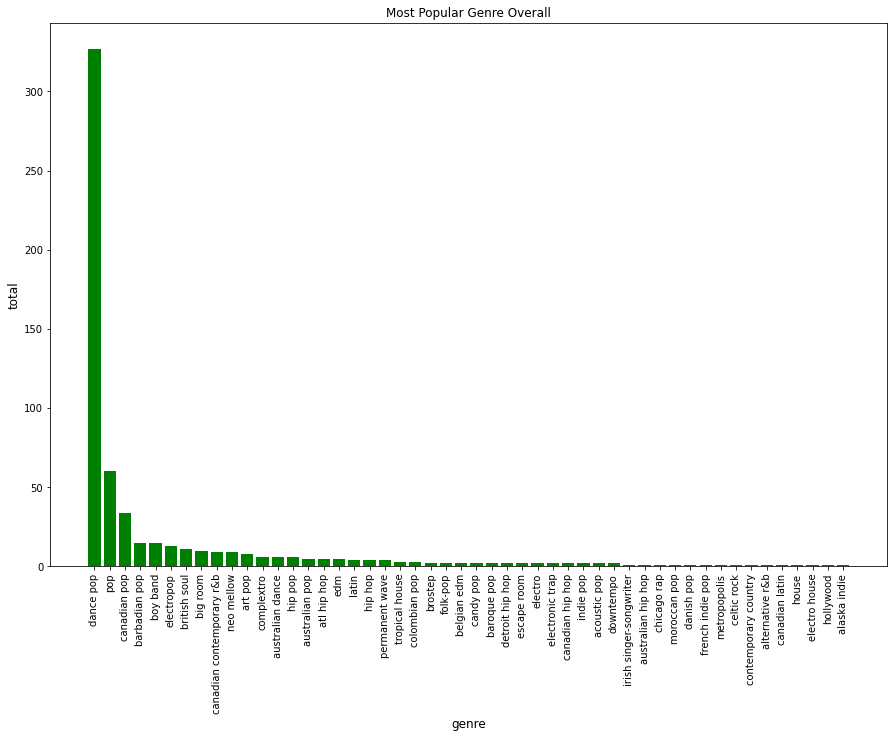

In [6]:
# Graph popular genre overall
plt.figure(figsize=[15,10])
x_values=top_genre_df['genre']
y_values=top_genre_df['total']

plt.bar(x_values, y_values, color = 'g')
plt.xlabel('genre', fontsize = 12)
plt.xticks(rotation='vertical')

plt.ylabel('total', fontsize = 12)
plt.title('Most Popular Genre Overall')
plt.show()

# save plot as .pngs
#plt.savefig("../images/Most Popular Genre Overall.png")



In [12]:
# Determine most popular genre by year
top_genre_year_df = music_data_pd.groupby(["year", "top genre"]).count()
top_genre_year_df = top_genre_year_df.sort_values(["year", "Unnamed: 0"], ascending=False)
#top_genre_year_df.head()
clean_by_year_df = top_genre_year_df.drop(['title', 'artist', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur',
                                           'acous', 'spch', 'pop' ], axis=1)
#clean_by_year_df

cleaner_by_year_df = clean_by_year_df[(clean_by_year_df['Unnamed: 0']>11)]
cleaner_by_year_df.reset_index(inplace=True)
cleaner_by_year_df.columns = ["Year", "Top Genre", "Total"]
cleaner_by_year_df


,Year,Top Genre,Total
0,2018,dance pop,38
1,2017,dance pop,31
2,2016,dance pop,46
3,2015,dance pop,52
4,2014,dance pop,27
5,2013,dance pop,42
6,2012,dance pop,15
7,2011,dance pop,38
8,2010,dance pop,31


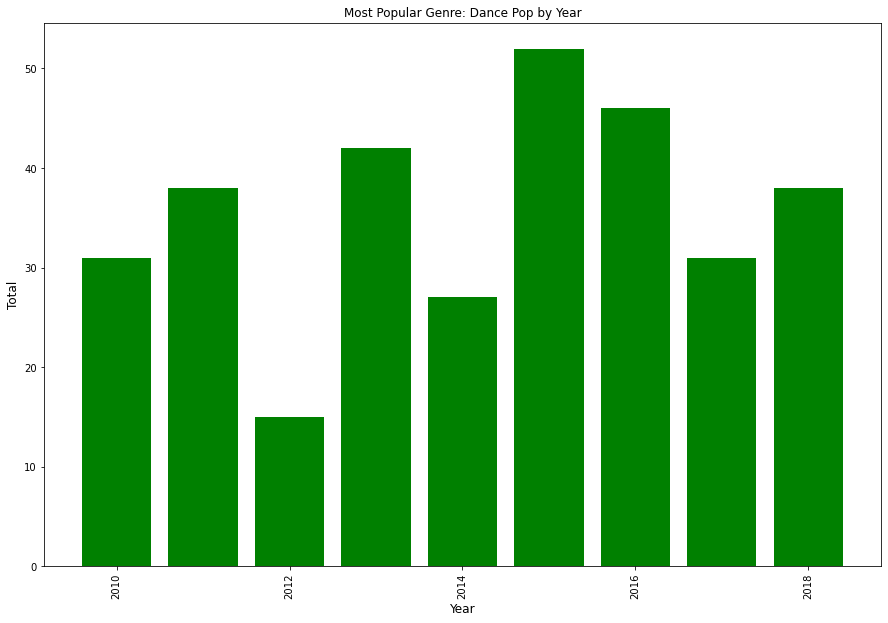

<Figure size 432x288 with 0 Axes>

In [18]:
plt.figure(figsize=[15,10])
x_axis=cleaner_by_year_df['Year']
y_axis=cleaner_by_year_df['Total']

plt.bar(x_axis, y_axis, color = 'g')
plt.xlabel('Year', fontsize = 12)
plt.xticks(rotation='vertical')

plt.ylabel('Total', fontsize = 12)
plt.title('Most Popular Genre: Dance Pop by Year')
plt.show()

# save plot as .pngs
plt.savefig("images/Most Popular Genre Overall.png")


In [10]:
# Most popular artist overall
top_artist_df = pd.DataFrame({"total":  music_data_pd["artist"].value_counts()})
top_artist_df = top_artist_df[(top_artist_df['total']>9)]
top_artist_df = top_artist_df.sort_values("total", ascending=False)
top_artist_df.reset_index(inplace=True)
top_artist_df.columns = ["artist", "total"]
top_artist_df

,artist,total
0,Katy Perry,17
1,Justin Bieber,16
2,Maroon 5,15
3,Rihanna,15
4,Lady Gaga,14
5,Bruno Mars,13
6,The Chainsmokers,11
7,Pitbull,11
8,Ed Sheeran,11
9,Shawn Mendes,11


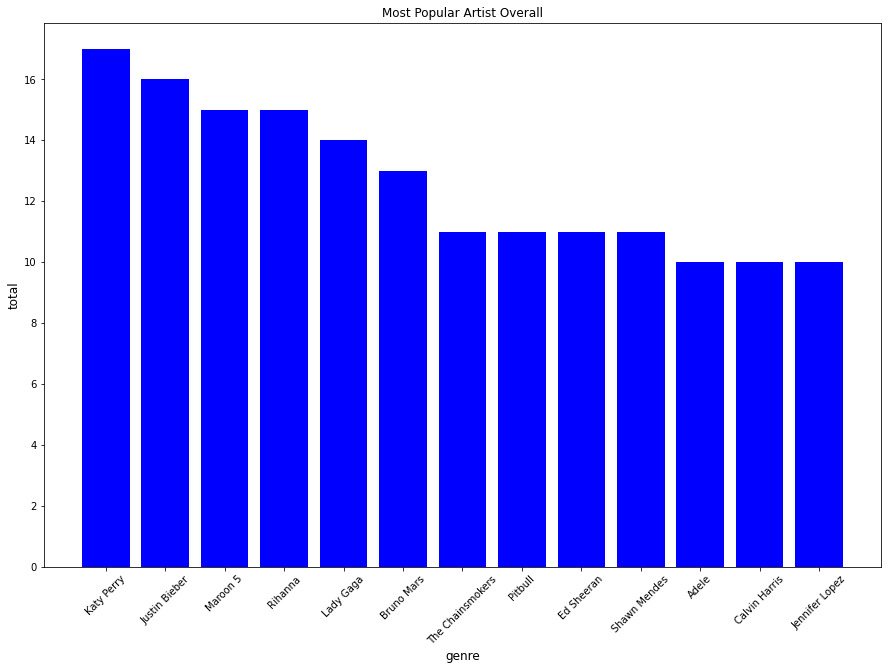

In [11]:
# Graph most popular artist overall
plt.figure(figsize=[15,10])
x_values=top_artist_df['artist']
y_values=top_artist_df['total']

plt.bar(x_values, y_values, color = 'b')
plt.xlabel('genre', fontsize = 12)
plt.xticks(rotation='45')

plt.ylabel('total', fontsize = 12)
plt.title('Most Popular Artist Overall')
plt.show()

# save plot as .pngs
#plt.savefig("../Most Popular Genre Overall.png")

In [12]:
# Most popular artist by year
# Determine most popular artist by year
top_artist_year_df = music_data_pd.groupby(["year", "artist"]).count()
top_artist_year_df
top_artist_year_df = top_artist_year_df.sort_values(["year", "Unnamed: 0"], ascending=False)
top_artist_year_df.head()

#clean by year
clart_by_year_df = top_artist_year_df.drop(['title','top genre','bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur',
                                            'acous', 'spch', 'pop' ], axis=1)
#clart_by_year_df


clart_by_year_df = clart_by_year_df[(clart_by_year_df['Unnamed: 0']>2)]
#clart_by_year_df
clart_by_year_df.reset_index(inplace=True)
clart_by_year_df.columns = ["Year", "Top Artist", "Total"]
clart_by_year_df


,Year,Top Artist,Total
0,2019,Ed Sheeran,5
1,2019,The Chainsmokers,3
2,2018,Shawn Mendes,4
3,2018,Dua Lipa,3
4,2018,Justin Timberlake,3
5,2018,Taylor Swift,3
6,2017,DNCE,3
7,2017,Katy Perry,3
8,2017,Lana Del Rey,3
9,2017,The Chainsmokers,3


In [16]:
# Most popular song overall
top_title_df = pd.DataFrame({"total":  music_data_pd["title"].value_counts()})
top_title_df = top_title_df[(top_title_df['total']>1)]
top_title_df = top_title_df.sort_values("total", ascending=False)
top_title_df.reset_index(inplace=True)
top_title_df.columns = ["title", "total"]
top_title_df

,title,total
0,We Are Never Ever Getting Back Together,2
1,Say Something,2
2,Kissing Strangers,2
3,Written in the Stars (feat. Eric Turner),2
4,A Little Party Never Killed Nobody (All We Got),2
5,Just the Way You Are,2
6,Marry You,2
7,All I Ask,2
8,Castle Walls (feat. Christina Aguilera),2
9,Sugar,2


In [ ]:
# Least popular artist

In [ ]:
# Calculate the statistical analysis for beats per minute

In [ ]:
# Are any songs outliers for beats per minute? Graph box and whisker plot

In [ ]:
# Do beats per minute correlate to ‘dancibility’? Graph results